# Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
survey = pd.read_csv('data/surveys_responses.csv')
survey

,TEXT1,TEXT2,SIMILARITY_SCORE,SIMILARITY_CONFIDENCE,TEXT1_HIGHLIGHT,TEXT1_HIGHLIGHT_POSITION,TEXT2_HIGHLIGHT,TEXT2_HIGHLIGHT_POSITION
0,HABEAS CORPUS. AÇÃO DE DESTITUIÇÃO DO PODER FA...,RECURSO ESPECIAL. AÇÃO INDENIZATÓRIA. LEVANTAM...,0,4,"A observância do cadastro de adotantes, não é ...",Corpo,ausência de impugnação dos fundamentos do acó...,Corpo
1,HABEAS CORPUS. AÇÃO DE DESTITUIÇÃO DO PODER FA...,RECURSO ESPECIAL. AÇÃO INDENIZATÓRIA. LEVANTAM...,0,4,Não relacionado,Corpo,Não relacionado,Corpo
2,PROCESSUAL CIVIL. AGRAVO REGIMENTAL. ART. 535 ...,CIVIL E CONSUMIDOR. RECURSO ESPECIAL. CONTRATO...,1,4,Inviável a análise de matéria federal não pre...,Corpo,"deve-se reconhecer a violação ao art. 51, I, d...",Corpo
3,PROCESSUAL CIVIL. AGRAVO REGIMENTAL. ART. 535 ...,CIVIL E CONSUMIDOR. RECURSO ESPECIAL. CONTRATO...,2,4,O acórdão recorrido está expressamente embasad...,Corpo,Anulada a cláusula que limita o valor da inden...,Corpo
4,AGRAVO REGIMENTAL NO HABEAS CORPUS. DIREIT...,PROCESSUAL PENAL. CRIME DE TRÂNSITO. DIREÇÃ...,2,4,os crimes de embriaguez ao volante,Corpo,dirigir veículo automotor em via\npública com...,Corpo
...,...,...,...,...,...,...,...,...
235,AGRAVO REGIMENTAL EM RECURSO ESPECIAL. SEGURO....,RECURSO ESPECIAL. PENAL. TRÁFICO ILÍCITO DE DR...,0,4,AGRAVO REGIMENTAL EM RECURSO ESPECIAL. SEGURO....,Cabeçalho,RECURSO ESPECIAL. PENAL. TRÁFICO ILÍCITO DE DR...,Cabeçalho
236,MANDADO DE SEGURANÇA. LEASING. ISS. AUTORIDADE...,PROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE S...,0,0,sem similaridade,Corpo,sem similaridade,Corpo
237,MANDADO DE SEGURANÇA. LEASING. ISS. AUTORIDADE...,PROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE S...,0,4,MANDADO DE SEGURANÇA. LEASING. ISS. AUTORIDADE...,Cabeçalho,PROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE S...,Cabeçalho
238,MANDADO DE SEGURANÇA. ADMINISTRATIVO. POLICIAL...,ADMINISTRATIVO. MANDADO DE SEGURANÇA. SERV...,3,1,mandado de segurança,Corpo,mandado de segurança,Corpo


### Pares com mais de um rótulo

In [3]:
survey_one_label = survey[survey[['TEXT1','TEXT2','SIMILARITY_SCORE']].groupby(['TEXT1','TEXT2'])['SIMILARITY_SCORE'].transform('count') == 1]
survey_one_label.to_csv('data/one_label.csv')

In [4]:
survey_two_label = survey[survey[['TEXT1','TEXT2','SIMILARITY_SCORE']].groupby(['TEXT1','TEXT2'])['SIMILARITY_SCORE'].transform('count') > 1]
survey_two_label

,TEXT1,TEXT2,SIMILARITY_SCORE,SIMILARITY_CONFIDENCE,TEXT1_HIGHLIGHT,TEXT1_HIGHLIGHT_POSITION,TEXT2_HIGHLIGHT,TEXT2_HIGHLIGHT_POSITION
0,HABEAS CORPUS. AÇÃO DE DESTITUIÇÃO DO PODER FA...,RECURSO ESPECIAL. AÇÃO INDENIZATÓRIA. LEVANTAM...,0,4,"A observância do cadastro de adotantes, não é ...",Corpo,ausência de impugnação dos fundamentos do acó...,Corpo
1,HABEAS CORPUS. AÇÃO DE DESTITUIÇÃO DO PODER FA...,RECURSO ESPECIAL. AÇÃO INDENIZATÓRIA. LEVANTAM...,0,4,Não relacionado,Corpo,Não relacionado,Corpo
2,PROCESSUAL CIVIL. AGRAVO REGIMENTAL. ART. 535 ...,CIVIL E CONSUMIDOR. RECURSO ESPECIAL. CONTRATO...,1,4,Inviável a análise de matéria federal não pre...,Corpo,"deve-se reconhecer a violação ao art. 51, I, d...",Corpo
3,PROCESSUAL CIVIL. AGRAVO REGIMENTAL. ART. 535 ...,CIVIL E CONSUMIDOR. RECURSO ESPECIAL. CONTRATO...,2,4,O acórdão recorrido está expressamente embasad...,Corpo,Anulada a cláusula que limita o valor da inden...,Corpo
4,AGRAVO REGIMENTAL NO HABEAS CORPUS. DIREIT...,PROCESSUAL PENAL. CRIME DE TRÂNSITO. DIREÇÃ...,2,4,os crimes de embriaguez ao volante,Corpo,dirigir veículo automotor em via\npública com...,Corpo
...,...,...,...,...,...,...,...,...
235,AGRAVO REGIMENTAL EM RECURSO ESPECIAL. SEGURO....,RECURSO ESPECIAL. PENAL. TRÁFICO ILÍCITO DE DR...,0,4,AGRAVO REGIMENTAL EM RECURSO ESPECIAL. SEGURO....,Cabeçalho,RECURSO ESPECIAL. PENAL. TRÁFICO ILÍCITO DE DR...,Cabeçalho
236,MANDADO DE SEGURANÇA. LEASING. ISS. AUTORIDADE...,PROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE S...,0,0,sem similaridade,Corpo,sem similaridade,Corpo
237,MANDADO DE SEGURANÇA. LEASING. ISS. AUTORIDADE...,PROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE S...,0,4,MANDADO DE SEGURANÇA. LEASING. ISS. AUTORIDADE...,Cabeçalho,PROCESSUAL CIVIL. ADMINISTRATIVO. MANDADO DE S...,Cabeçalho
238,MANDADO DE SEGURANÇA. ADMINISTRATIVO. POLICIAL...,ADMINISTRATIVO. MANDADO DE SEGURANÇA. SERV...,3,1,mandado de segurança,Corpo,mandado de segurança,Corpo


In [5]:
heuristic = pd.read_csv('data/to_anotate.csv')
heuristic

,sentence_A,sentence_B,score
0,PROCESSUAL CIVIL E ADMINISTRATIVO. SERVIDÃO AD...,PROCESSUAL CIVIL E ADMINISTRATIVO - DESAPROPRI...,2
1,AGRAVO INTERNO NO AGRAVO EM RECURSO ESPE...,AGRAVO INTERNO NO AGRAVO EM RECURSO ESPECIAL....,4
2,HABEAS CORPUS. AÇÃO DE DESTITUIÇÃO DO PODER FA...,RECURSO ESPECIAL. PORTE DE ARMA DE FOGO E MUN...,0
3,PROCESSUAL CIVIL. AÇÃO CIVIL PÚBLICA. AMBIENTA...,DIREITO CIVIL. FAMÍLIA. ADOÇÃO DE MENORES POR ...,0
4,AGRAVO REGIMENTAL. RECURSO ORDINÁRIO. MANDADO ...,ADMINISTRATIVO. RECURSO ORDINÁRIO EM MANDADO D...,4
...,...,...,...
136,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,2
137,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO AGRAVO ...,4
138,PROCESSUAL CIVIL E ADMINISTRATIVO. AGRAVO REGI...,PROCESSUAL CIVIL - ADMINISTRATIVO - RECURSO ES...,4
139,AGRAVO REGIMENTAL NO RECURSO EM MANDADO DE SEG...,ADMINISTRATIVO E PROCESSUAL CIVIL. MANDADO...,2


## Questões de Pesquisa

1. Quão relacionadas estão os rótulos dos especialistas para um mesmo par de documentos?
2. Onde estão concentrados os trechos principais dos documentos, corpo ou cabeçalho?
3. Qual a distribuição dos rótulos no conjunto de dados anotado heuristicamente?
4. Qual a distribuição dos rótulos no conjunto de dados anotado pelos especialistas?
5. Quão relacionados estão os rótulos dos especialistas e da heurística?
6. Qual a média e desvio padrão da confiança dos especialistas aos rótulos atribuídos?

In [6]:
# https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value
survey_tmp = survey_two_label[['TEXT1','TEXT2', 'SIMILARITY_SCORE']].astype('object').groupby(['TEXT1','TEXT2'])['SIMILARITY_SCORE']\
                                                    .agg(pd.Series.mode).to_frame().reset_index()
survey_tmp

,TEXT1,TEXT2,SIMILARITY_SCORE
0,ADMINISTRATIVO E PROCESSUAL CIVIL. AGRAVO ...,AGRAVO REGIMENTAL. PROCESSUAL CIVIL. NÃO HÁ QU...,"[0, 3]"
1,ADMINISTRATIVO E PROCESSUAL CIVIL. AGRAVO ...,CHEQUE. CAUÇÃO. CAUSA DEBENDI. POSSIBILIDADE\n...,"[0, 2]"
2,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,EMBARGOS DE DECLARAÇÃO. PROCESSO CIVIL. APLICA...,"[0, 3]"
3,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECU...,"[1, 2]"
4,ADMINISTRATIVO E PROCESSUAL CIVIL. SUPOSTA...,AGRAVO INTERNO EM AGRAVO (ART. 544 DO...,"[0, 3]"
...,...,...,...
95,RECURSO ESPECIAL - PROPRIEDADE INDUSTRIAL - DI...,PENAL E PROCESSUAL. RECURSO ORDINÁRIO EM HABEA...,0
96,RECURSO ESPECIAL - PROPRIEDADE INDUSTRIAL - DI...,PENAL. PROCESSUAL PENAL. HABEAS CORPUS SUBSTIT...,0
97,RECURSO ESPECIAL. AÇÃO DE COBRANÇA. AVALISTA D...,Direito comercial e processual civil. Agravo n...,"[1, 3]"
98,RECURSO ORDINÁRIO EM MANDADO DE SEGURANÇA. ORD...,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,"[0, 3]"


In [7]:
survey_discrepancy = survey_tmp.iloc[[x.Index for x in survey_tmp.itertuples() if type(x.SIMILARITY_SCORE)== np.ndarray]]
survey_discrepancy.to_csv('data/discrepancy.csv')
survey_discrepancy

,TEXT1,TEXT2,SIMILARITY_SCORE
0,ADMINISTRATIVO E PROCESSUAL CIVIL. AGRAVO ...,AGRAVO REGIMENTAL. PROCESSUAL CIVIL. NÃO HÁ QU...,"[0, 3]"
1,ADMINISTRATIVO E PROCESSUAL CIVIL. AGRAVO ...,CHEQUE. CAUÇÃO. CAUSA DEBENDI. POSSIBILIDADE\n...,"[0, 2]"
2,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,EMBARGOS DE DECLARAÇÃO. PROCESSO CIVIL. APLICA...,"[0, 3]"
3,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECU...,"[1, 2]"
4,ADMINISTRATIVO E PROCESSUAL CIVIL. SUPOSTA...,AGRAVO INTERNO EM AGRAVO (ART. 544 DO...,"[0, 3]"
...,...,...,...
91,PROCESSUAL CIVIL. EMBARGOS DE DECLARAÇÃO NO RE...,AGRAVO REGIMENTAL. PROCESSUAL CIVIL. EXECUÇÃO ...,"[0, 2]"
92,RECURSO EM HABEAS CORPUS. TRÁFICO DE DROGAS E ...,HABEAS CORPUS. ARTS. 33 E 35 DA LEI Nº 11.343/...,"[2, 3]"
97,RECURSO ESPECIAL. AÇÃO DE COBRANÇA. AVALISTA D...,Direito comercial e processual civil. Agravo n...,"[1, 3]"
98,RECURSO ORDINÁRIO EM MANDADO DE SEGURANÇA. ORD...,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,"[0, 3]"


In [8]:
survey_agreement = survey.iloc[[x.Index for x in survey_tmp.itertuples() if type(x.SIMILARITY_SCORE) == int]]
survey_agreement

,TEXT1,TEXT2,SIMILARITY_SCORE,SIMILARITY_CONFIDENCE,TEXT1_HIGHLIGHT,TEXT1_HIGHLIGHT_POSITION,TEXT2_HIGHLIGHT,TEXT2_HIGHLIGHT_POSITION
8,AGRAVO REGIMENTAL NO PEDIDO SUSPENSIVO. LEGIT...,AGRAVO REGIMENTAL NO AGRAVO REGIMENTAL. SUSPEN...,1,4,"entendimento pacificado neste Corte,",Corpo,A jurisprudência já assentou entendimento,Corpo
9,AGRAVO REGIMENTAL NO PEDIDO SUSPENSIVO. LEGIT...,AGRAVO REGIMENTAL NO AGRAVO REGIMENTAL. SUSPEN...,4,4,"Conforme entendimento pacificado neste Corte,...",Corpo,A jurisprudência já assentou entendimento no s...,Corpo
11,AGRAVO REGIMENTAL NOS EMBARGOS DE DECLARAÇÃO N...,RECURSO ESPECIAL. CIVIL. INCORPORAÇÃO IMOBILIÁ...,3,4,A abusividade da pactuação deve ser cabalmente...,Corpo,"Todavia, a autorização de alienação do imóvel ...",Corpo
13,DIREITO CIVIL E DO CONSUMIDOR. AGRAVO NO RECUR...,PENAL. HABEAS CORPUS SUBSTITUTIVO DE R...,0,4,Não relacionado,Corpo,Não relacionado,Corpo
17,CIVIL E PROCESSUAL CIVIL. BANCÁRIO. AGRAVO REG...,AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...,2,4,A taxa média de mercado apurada pelo Banco Cen...,Corpo,as instituições financeiras não se sujeitam à ...,Corpo
18,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECU...,1,4,lesão causada ao meio ambiente\npermite a cu...,Corpo,A cobrança indevida de serviço de telefon...,Corpo
19,ADMINISTRATIVO E PROCESSUAL CIVIL. RECURSO...,PROCESSUAL CIVIL. AGRAVO REGIMENTAL NO RECU...,2,4,A responsabilidade pelos atos que desresp...,Corpo,cobrança indevida de serviço de telefoni...,Corpo
25,EXECUÇÃO PENAL. HABEAS CORPUS SUBSTITUTIVO DE ...,HABEAS CORPUS SUBSTITUTIVO DE RECURSO ORDINÁRI...,3,4,HABEAS CORPUS NÃO CONHECIDO.,Cabeçalho,HABEAS CORPUS CONCEDIDA DE OFÍCIO,Cabeçalho
43,ADMINISTRATIVO. MANDADO DE SEGURANÇA. PROCESSO...,PROCESSUAL CIVIL. ADMINISTRATIVO. DANOS AMBIEN...,0,4,1. A prova produzida em ação penal pode ser us...,Corpo,"0. Deveras, o Tribunal a quo à luz de ampla c...",Corpo
47,AGRAVO REGIMENTAL. AGRAVO EM RECURSO ESPECIAL....,PROCESSUAL CIVIL. LOCAÇÃO. AÇÃO DE DESPEJO. AP...,4,4,2. O recurso de apelação que ataca sentença pr...,Corpo,I - O Superior Tribunal de Justiça já pacifico...,Corpo


In [12]:
len(survey_agreement)

32

<AxesSubplot:xlabel='Rótulos', ylabel='Quantidade'>

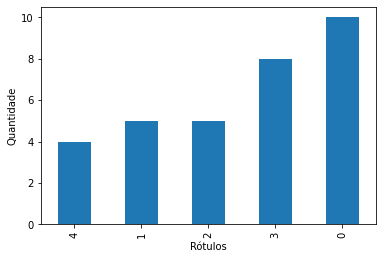

In [9]:
survey_agreement['SIMILARITY_SCORE'].value_counts().sort_values().plot(kind = 'bar', xlabel='Rótulos', ylabel='Quantidade')

### 1. Quão relacionadas estão os rótulos dos especialistas para um mesmo par de documentos?

Foram coletados 240 rótulos para 120 pares de documentos diferentes. Dos 120 pares de documentos, 100 pares foram rótulados por mais de um anotador. Dos 100 pares anotados por mais de um anotador, 32 anotadores concordaram com o mesmo rótulo, enquanto 68 rotularam de maneiras distintas.
A variância e o desvio padrão entre os 68 pares rotulados distintamente são os seguintes:

In [10]:
tmp = np.array([t.tolist() for t in survey_discrepancy.SIMILARITY_SCORE.values])
mean_variance = np.mean(np.var(tmp, axis=1))
mean_std = np.std(np.std(tmp, axis=1))
print('Mean variance: ', mean_variance, ' Mean STD: ', mean_std)

Mean variance:  0.8125  Mean STD:  0.38256498645084014
